#Information
Group 9 : Resume parser

Content : Preprocessing the data



#Libary import



In [ ]:
# import necessary packages
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import  word_tokenize
from nltk.corpus import stopwords


In [ ]:
# downloads
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Connect to the gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#EDA

In [ ]:
# Move the directory to the csv files
%cd /content/drive/MyDrive/NLP_Final_changes/

/content/drive/MyDrive/NLP_Final_changes


In [ ]:
#Read CSV
df=pd.read_csv("ResumeDataSet.csv")

In [ ]:
# Check any null values that exist in the input data
# Proceed to modify the data frame if you find any

df.isnull().values.any()

False

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


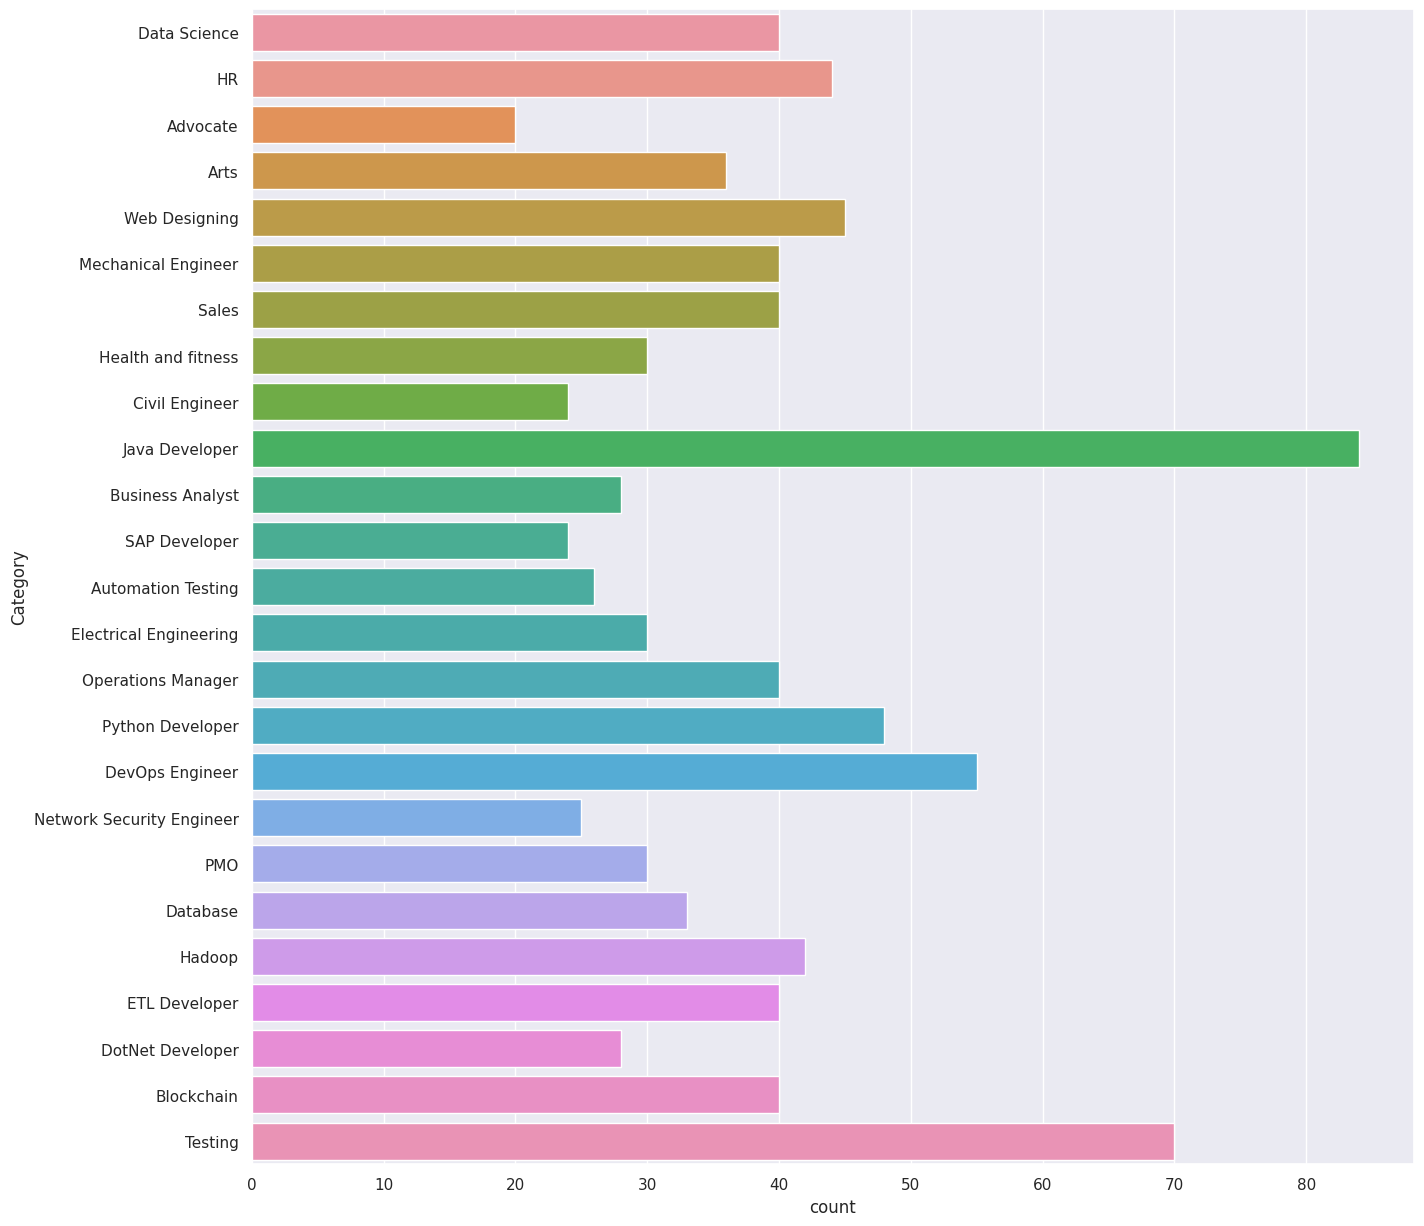

In [ ]:
# Figure
sns.set(rc={'figure.figsize':(15,15)})
val=sns.countplot(y=df["Category"])
fig = val.get_figure()
fig.savefig("Category_plot.png")

In [ ]:
df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
all_text = ' '.join(df['Resume'])

In [ ]:
# Generating word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_text)

Wordcloud before preprocessing 

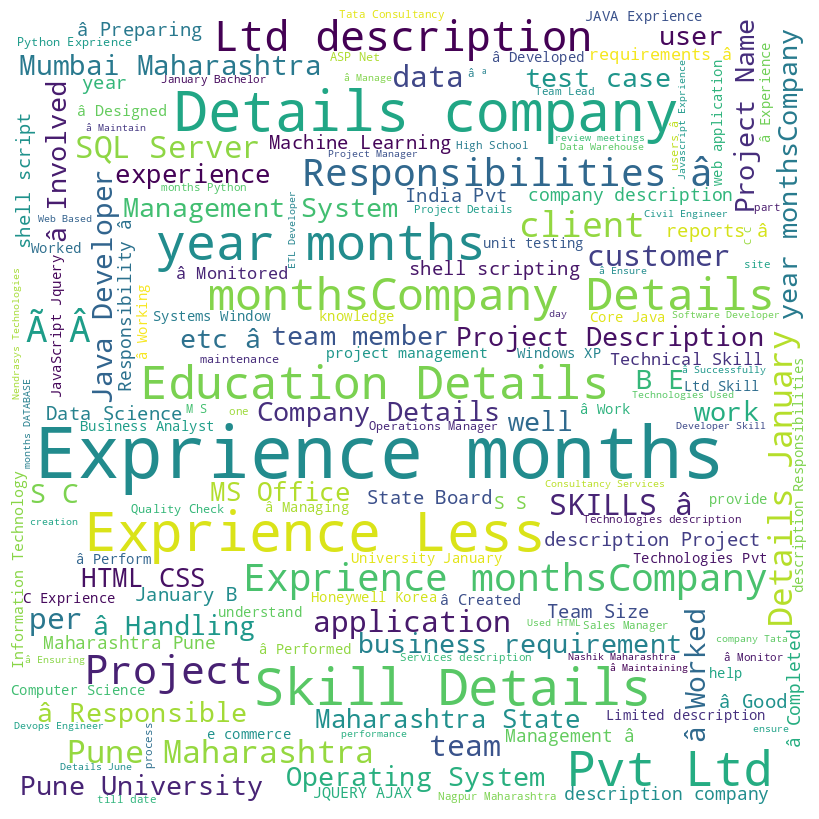

In [ ]:
# Word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Preprocessing the data
# tokenize, lower case the string, remove stop words and non alpha numeric characters, and lemmatize
def preprocess_text(resume_list):
  resumes = []
  stop_words = set(stopwords.words('english'))
  lemmatizer = WordNetLemmatizer()

  for resume in resume_list:
      resume = resume.lower()
      words=[]
      for word in word_tokenize(resume):
        if word.isalpha():
          if word not in stop_words:
            words.append(lemmatizer.lemmatize(word))
      resumes.append(' '.join(words))
  
  return resumes

In [ ]:
# add the cleaned text into the new column to save resources
df['cleaned_resume'] = preprocess_text(df['Resume'])

In [ ]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may data scientist data s...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...


In [ ]:
all_text = ' '.join(df['cleaned_resume'])

In [ ]:
# generate word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_text)

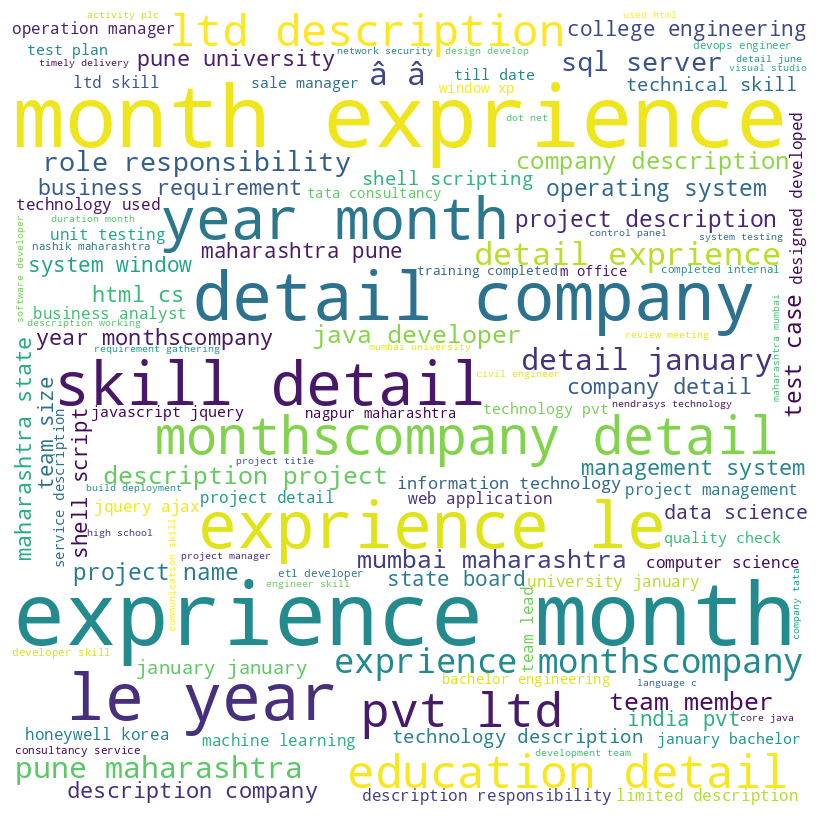

<Figure size 1500x1500 with 0 Axes>

In [ ]:
# Word cloud after preprocessing
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig("Word_cloud.png")

In [ ]:
# Save the preprocessed CSV
df.to_csv("cleaned_resume_final.csv")